In [61]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
df = pd.read_csv('datasets/Salary_Data.csv')

In [63]:
print(df.sample(10))
df.shape
df['Salary'][16]

    YearsExperience    Salary
10              3.9   63218.0
6               3.0   60150.0
1               1.3   46205.0
28             10.3  122391.0
24              8.7  109431.0
4               2.2   39891.0
11              4.0   55794.0
23              8.2  113812.0
18              5.9   81363.0
21              7.1   98273.0


66029.0

In [70]:
class Normalizer:
    def __init__(self):
        pass
    
    def min_element(self,df):
        np_array = df.to_numpy(dtype='float32')
        return np.min(np_array)
    
    def max_element(self,df):
        np_array = df.to_numpy(dtype='float32')
        return np.max(np_array)
    
    def mean_of_elements(self,df):
        np_array = df.to_numpy(dtype='float32')
        sum = np.sum(np_array)
        return sum/np.size(np_array)
    
    def median_of_elements(self,df):
        np_array = df.to_numpy()
        np.sort(np_array)
        size = np.size(np_array)
        if(np.size(np_array) %2==0):
            f1 = np_array[int(size/2)]
            f2 = np_array[int(size/2+1)]
            median = float((f1+f2)/2)
            return median
        else:
            median = np_array[size/2]
            return median
        
    def transform(self,df):
        np_array = df.to_numpy(dtype='float32')
        min = self.min_element(df)
        max = self.max_element(df)
        for i in range(np.size(np_array)):
            np_array[i] = (np_array[i]-min)/(max-min)
        return np_array
    
    

In [71]:
normal = Normalizer()
normal.min_element(df['Salary'])

37731.0

In [72]:
normal.max_element(df['Salary'])

122391.0

In [73]:
normal.mean_of_elements(df['Salary'])

76003.0

In [74]:
normal.median_of_elements(df['Salary'])

66983.5

In [103]:
salary = normal.transform(df['Salary'])
experience = normal.transform(df['YearsExperience'])
data ={
    'Experience':experience,
    'Salary':salary
}
dataset = pd.DataFrame(data)
print(dataset.to_string())

    Experience    Salary
0     0.000000  0.019041
1     0.021277  0.100094
2     0.042553  0.000000
3     0.095745  0.068438
4     0.117021  0.025514
5     0.191489  0.223376
6     0.202128  0.264812
7     0.223404  0.197425
8     0.223404  0.315545
9     0.276596  0.229837
10    0.297872  0.301051
11    0.308511  0.213359
12    0.308511  0.227097
13    0.319149  0.228561
14    0.361702  0.276163
15    0.404255  0.356804
16    0.425532  0.334255
17    0.446809  0.535755
18    0.510638  0.515379
19    0.521277  0.663938
20    0.606383  0.637928
21    0.638298  0.715119
22    0.723404  0.750898
23    0.755319  0.898665
24    0.808511  0.846917
25    0.840426  0.801453
26    0.893617  0.935956
27    0.904255  0.884763
28    0.978723  1.000000
29    1.000000  0.993870


<Axes: xlabel='Salary', ylabel='count'>

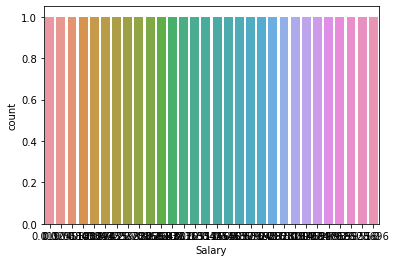

In [105]:
sns.countplot(data=dataset,x='Salary')

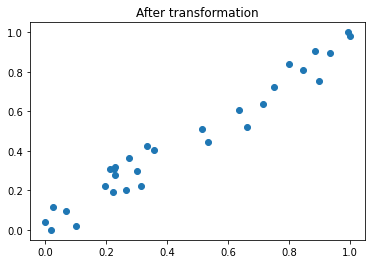

In [107]:
plt.scatter(dataset['Salary'],dataset['Experience'])
plt.title('After transformation')
plt.show()

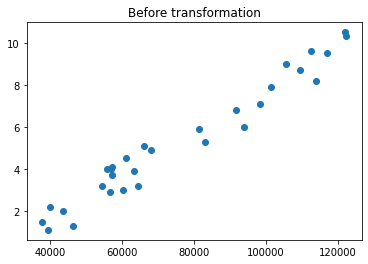

In [109]:
plt.scatter(df['Salary'],df['YearsExperience'])
plt.title('Before transformation')
plt.show()